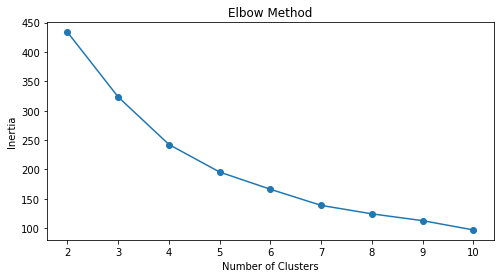

Davies-Bouldin Index: 0.8621444241565275


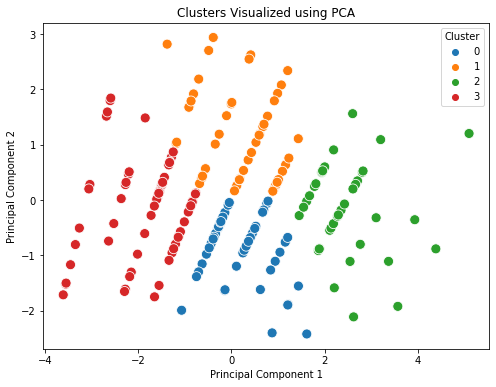

Cluster Summary:
          TotalSpend  AverageSpend  TransactionCount  Frequency
Cluster                                                        
0        3069.617000    530.916863          5.860000   5.860000
1        4161.340980    937.687098          4.529412   4.529412
2        6083.723158    754.598033          8.157895   8.157895
3        1551.747333    563.097431          2.766667   2.766667


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the data
customers = pd.read_csv("D:\ZEOTAP interview\Customers.csv")
transactions = pd.read_csv("D:\ZEOTAP interview\Transactions.csv")

# Merge data on a common key (e.g., 'CustomerID')
data = pd.merge(customers, transactions, on='CustomerID')

# Step 2: Feature Engineering
# Example: Aggregate transaction data per customer
customer_summary = data.groupby('CustomerID').agg({
    'TotalValue': ['sum', 'mean', 'count'],  # Total spend, average spend, number of transactions
    'TransactionDate': 'nunique'                   # Frequency of transactions (unique days)
}).reset_index()

# Flatten column names
data_features = customer_summary.copy()
data_features.columns = ['CustomerID', 'TotalSpend', 'AverageSpend', 'TransactionCount', 'Frequency']
data_features = data_features.drop('CustomerID', axis=1)

# Step 3: Preprocessing
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_features)

# Step 4: Clustering (K-Means)
# Determine the optimal number of clusters using the Elbow Method
inertia = []
clusters_range = range(2, 11)
for k in clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(clusters_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Choose optimal k (e.g., 4)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_scaled)
labels = kmeans.labels_

# Step 5: Evaluate Clustering
db_index = davies_bouldin_score(data_scaled, labels)


print(f'Davies-Bouldin Index: {db_index}')


# Step 6: Visualize Clusters using PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
data_pca = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
data_pca['Cluster'] = labels

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data_pca, palette='tab10', s=100)
plt.title('Clusters Visualized using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Step 7: Report Results
cluster_summary = data_features.copy()
cluster_summary['Cluster'] = labels
summary = cluster_summary.groupby('Cluster').mean()
print("Cluster Summary:")
print(summary)
